<a href="https://colab.research.google.com/github/Mayur619/Malaria-detection/blob/master/Malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
!mkdir kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v /content

mkdir: cannot create directory ‘kaggle’: File exists
- path is now set to: /content


In [21]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!unzip datasets/iarunava/cell-images-for-detecting-malaria/cell-images-for-detecting-malaria.zip

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  datasets/iarunava/cell-images-for-detecting-malaria/cell-images-for-detecting-malaria.zip
   creating: cell_images/
   creating: cell_images/Parasitized/
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/Parasitize

In [0]:
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.preprocessing import image
import numpy as np
import keras
BATCH_SIZE=50
EPOCHS=25

In [107]:
images=[]
labels=[]
IMG_SIZE=50
for category in os.listdir("cell_images/"):
  for img_file in os.listdir("cell_images/"+category):
    try:
      image=cv2.imread(os.path.join("cell_images",category,img_file))
      image=Image.fromarray(image,'RGB')
      image=image.resize((IMG_SIZE,IMG_SIZE))
      images.append(np.array(image))
      labels.append(category)
    except AttributeError:
      pass
images=np.array(images)
labels=np.array(labels)
images=images.astype('float32')/255
print("Total "+str(len(images))+" images processed.")

Total 27558 images processed.


In [0]:
le=LabelEncoder()
labels=le.fit_transform(labels)
labels=keras.utils.to_categorical(labels,len(os.listdir("cell_images/")))
#ohe=OneHotEncoder()
#labels=ohe.fit_transform(labels.reshape(-1,1))

In [0]:
train_img,test_img,train_label,test_label=train_test_split(images,labels,train_size=0.8,shuffle=True)

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 5, 5, 128)       

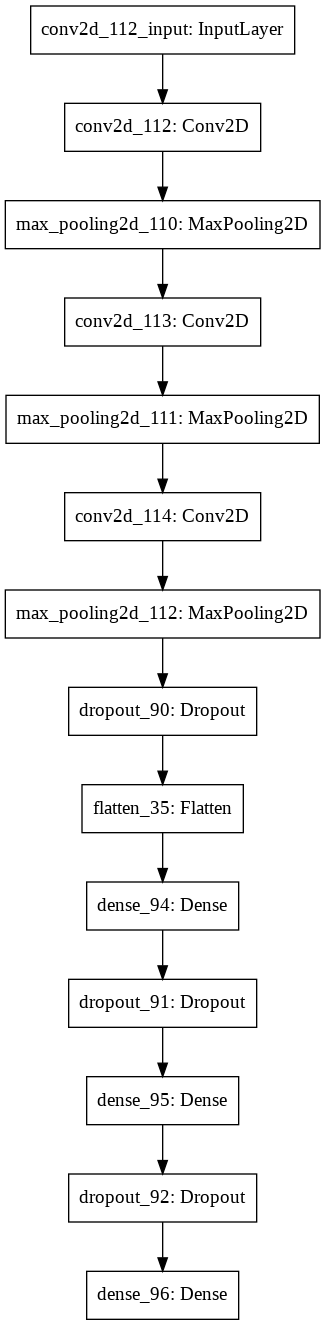

In [164]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(125,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='sigmoid'))
model.summary()
plot_model(model,"model.png")

In [165]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_img,train_label,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.1)

Train on 19841 samples, validate on 2205 samples
Epoch 1/100
19841/19841 [==============================] - 10s 522us/step - loss: 0.3486 - acc: 0.8345 - val_loss: 0.1780 - val_acc: 0.9229
Epoch 2/100
19841/19841 [==============================] - 6s 300us/step - loss: 0.1731 - acc: 0.9424 - val_loss: 0.1731 - val_acc: 0.9478
Epoch 3/100
19841/19841 [==============================] - 6s 301us/step - loss: 0.1471 - acc: 0.9542 - val_loss: 0.1448 - val_acc: 0.9551
Epoch 4/100
19841/19841 [==============================] - 6s 300us/step - loss: 0.1416 - acc: 0.9564 - val_loss: 0.1455 - val_acc: 0.9574
Epoch 5/100
19841/19841 [==============================] - 6s 299us/step - loss: 0.1381 - acc: 0.9574 - val_loss: 0.1399 - val_acc: 0.9583
Epoch 6/100
19841/19841 [==============================] - 6s 302us/step - loss: 0.1332 - acc: 0.9582 - val_loss: 0.1417 - val_acc: 0.9556
Epoch 7/100
19841/19841 [==============================] - 6s 301us/step - loss: 0.1267 - acc: 0.9602 - val_loss: 0.

In [166]:
pred_labels=model.predict(test_img)
pred_labels=np.argmax(pred_labels,axis=1)
print(accuracy_score(np.argmax(test_label,axis=1),pred_labels))

0.9604499274310595


In [0]:
model.save('malaria_detection_model.h5')

In [0]:
activation_outputs=[layer.output for layer in model.layers]
activation_model=Model(inputs=model.input,outputs=activation_outputs)

In [175]:
test_image=image.load_img('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png',target_size=(IMG_SIZE,IMG_SIZE))
test_image=image.img_to_array(test_image)
test_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
test_image=test_image.reshape((-1,IMG_SIZE,IMG_SIZE,3))
result=model.predict(test_image)
print(result)
activation_result=activation_model.predict(test_image)

[[1. 0.]]


Visualization of afilter from 1st Convolutional Layer

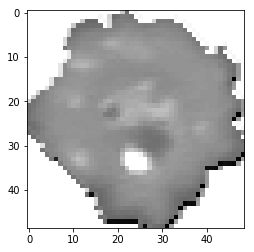

In [205]:
plt.imshow(activation_result[0][0,:,:,1],cmap='binary')